In [6]:
from pathlib import Path
import xarray as xr
import dask
from dask.diagnostics import ProgressBar
import gcsfs


In [2]:
# Parameters
local_base_path = Path('/home/ubuntu/aerth2mip/raw/basic_inference/fcn/cds/fcn-cds-00020/')


In [3]:
# Function to list all downloaded .nc4 files using pathlib
def list_downloaded_files(local_base_path, file_pattern):
    return list(local_base_path.rglob(file_pattern))  # This will recursively list all files matching the pattern

# Preprocess function
def preprocess(ds):
    # Save the original 'time' data
    original_time_values = ds['time'].values
    
    # Rename 'time' dimension to 'leadtime' and replace the index
    ds = ds.rename({'time': 'leadtime'})
    ds['leadtime'] = range(len(ds.leadtime))
    
    # Create a new 'time' dimension and assign the first value of the original 'time' data
    first_time_value = original_time_values[0]
    ds = ds.expand_dims('time')
    ds = ds.assign_coords(time=[first_time_value])
    
    return ds



# t850

In [35]:
file_pattern = 't850.nc4'

# Configure Dask to use a progress bar for all operations
dask.config.set(scheduler='threads')  # Use threaded scheduler; you can adjust as needed
ProgressBar().register()

# Use pathlib's glob to list the downloaded files
downloaded_files = list_downloaded_files(local_base_path, file_pattern)

# Verify if we have downloaded files
if not downloaded_files:
    print("No downloaded files found. Please check the download steps.")
else:
    # Use xarray to open the dataset with preprocessing
    ds = xr.open_mfdataset(
        sorted(downloaded_files),
        preprocess=preprocess,
        concat_dim='time',
        combine='nested',
        parallel=True,
        chunks={'lat': 120, 'lon': 120, 'leadtime': -1}  # Replace with your dataset's dims
    ) 
    
ds = ds.chunk({'time': 90})

print(ds)

# Set the GCS path for the base of the Zarr store
bucket_name = 'aes-analytics-0002-curated-ibu'
gcs_prefix = 'DataDrivenWeatherOutputs/processed/basic_inference/fcn/cds/fcn-cds-00020/'
base_gcs_path = f'gcs://{bucket_name}/{gcs_prefix}'


fs = gcsfs.GCSFileSystem()

# Create a unique Zarr store name based on the NetCDF file name pattern, without the .nc4 extension
# Assuming all files follow a similar naming pattern and taking the name from the first file
zarr_store_name = os.path.splitext(os.path.basename(downloaded_files[0]))[0]
gcs_zarr_path = os.path.join(base_gcs_path, f"{zarr_store_name}.zarr")

print(gcs_zarr_path)

# Write to a Zarr store on GCS
# The consolidated=True option can improve performance for reading metadata later
with ProgressBar():
    ds.to_zarr(store=gcs_zarr_path, mode='w', consolidated=True)

[########################################] | 100% Completed | 13.03 s
[########################################] | 100% Completed | 13.03 s
[########################################] | 100% Completed | 13.12 s
[########################################] | 100% Completed | 13.13 s
[########################################] | 100% Completed | 13.22 s
[########################################] | 100% Completed | 13.22 s


<xarray.Dataset>
Dimensions:   (lat: 720, lon: 1440, leadtime: 21, time: 730)
Coordinates:
  * lat       (lat) float64 90.0 89.75 89.5 89.25 ... -89.0 -89.25 -89.5 -89.75
  * lon       (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * leadtime  (leadtime) int64 0 1 2 3 4 5 6 7 8 ... 12 13 14 15 16 17 18 19 20
  * time      (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2022-12-31
Data variables:
    t850      (time, leadtime, lat, lon) float32 dask.array<chunksize=(90, 21, 120, 120), meta=np.ndarray>

gcs://aes-analytics-0002-curated-ibu/DataDrivenWeatherOutputs/processed/basic_inference/fcn/cds/fcn-cds-00020/t850.zarr
[########################################] | 100% Completed | 57m 23s
[########################################] | 100% Completed | 57m 23s
[########################################] | 100% Completed | 57m 23s
[########################################] | 100% Completed | 57m 23s
[########################################] | 100% Completed | 57m 24s
[########################################] | 100% Completed | 57m 24s
[########################################] | 100% Completed | 57m 24s


# r850

In [38]:
file_pattern = 'r850.nc4'

# Configure Dask to use a progress bar for all operations
dask.config.set(scheduler='threads')  # Use threaded scheduler; you can adjust as needed
ProgressBar().register()

# Use pathlib's glob to list the downloaded files
downloaded_files = list_downloaded_files(local_base_path, file_pattern)

# Verify if we have downloaded files
if not downloaded_files:
    print("No downloaded files found. Please check the download steps.")
else:
    # Use xarray to open the dataset with preprocessing
    ds = xr.open_mfdataset(
        sorted(downloaded_files),
        preprocess=preprocess,
        concat_dim='time',
        combine='nested',
        parallel=True,
        chunks={'lat': 120, 'lon': 120, 'leadtime': -1}  # Replace with your dataset's dims
    ) 
    
ds = ds.chunk({'time': 90})

print(ds)

# Set the GCS path for the base of the Zarr store
bucket_name = 'aes-analytics-0002-curated-ibu'
gcs_prefix = 'DataDrivenWeatherOutputs/processed/basic_inference/fcn/cds/fcn-cds-00020/'
base_gcs_path = f'gcs://{bucket_name}/{gcs_prefix}'


fs = gcsfs.GCSFileSystem()

# Create a unique Zarr store name based on the NetCDF file name pattern, without the .nc4 extension
# Assuming all files follow a similar naming pattern and taking the name from the first file
zarr_store_name = os.path.splitext(os.path.basename(downloaded_files[0]))[0]
gcs_zarr_path = os.path.join(base_gcs_path, f"{zarr_store_name}.zarr")

print(gcs_zarr_path)

# Write to a Zarr store on GCS
# The consolidated=True option can improve performance for reading metadata later
with ProgressBar():
    ds.to_zarr(store=gcs_zarr_path, mode='w', consolidated=True)


[########################################] | 100% Completed | 62.76 s
[########################################] | 100% Completed | 62.82 s
[########################################] | 100% Completed | 62.78 s
[########################################] | 100% Completed | 62.74 s
[########################################] | 100% Completed | 62.79 s
[########################################] | 100% Completed | 62.81 s
[########################################] | 100% Completed | 62.91 s
<xarray.Dataset>
Dimensions:   (lat: 720, lon: 1440, leadtime: 21, time: 730)
Coordinates:
  * lat       (lat) float64 90.0 89.75 89.5 89.25 ... -89.0 -89.25 -89.5 -89.75
  * lon       (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * leadtime  (leadtime) int64 0 1 2 3 4 5 6 7 8 ... 12 13 14 15 16 17 18 19 20
  * time      (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2022-12-31
Data variables:
    r850      (time, leadtime, lat, lon) float32 dask.array<chunksize=(90, 21, 120, 120), me

# t500

In [ ]:
file_pattern = 't500.nc4'

# Configure Dask to use a progress bar for all operations
dask.config.set(scheduler='threads')  # Use threaded scheduler; you can adjust as needed
ProgressBar().register()

# Use pathlib's glob to list the downloaded files
downloaded_files = list_downloaded_files(local_base_path, file_pattern)

# Verify if we have downloaded files
if not downloaded_files:
    print("No downloaded files found. Please check the download steps.")
else:
    # Use xarray to open the dataset with preprocessing
    ds = xr.open_mfdataset(
        sorted(downloaded_files),
        preprocess=preprocess,
        concat_dim='time',
        combine='nested',
        parallel=True,
        chunks={'lat': 120, 'lon': 120, 'leadtime': -1}  # Replace with your dataset's dims
    ) 
    
ds = ds.chunk({'time': 90})

print(ds)

# Set the GCS path for the base of the Zarr store
bucket_name = 'aes-analytics-0002-curated-ibu'
gcs_prefix = 'DataDrivenWeatherOutputs/processed/basic_inference/fcn/cds/fcn-cds-00020/'
base_gcs_path = f'gcs://{bucket_name}/{gcs_prefix}'


fs = gcsfs.GCSFileSystem()

# Create a unique Zarr store name based on the NetCDF file name pattern, without the .nc4 extension
# Assuming all files follow a similar naming pattern and taking the name from the first file
zarr_store_name = os.path.splitext(os.path.basename(downloaded_files[0]))[0]
gcs_zarr_path = os.path.join(base_gcs_path, f"{zarr_store_name}.zarr")

print(gcs_zarr_path)

# Write to a Zarr store on GCS
# The consolidated=True option can improve performance for reading metadata later
with ProgressBar():
    ds.to_zarr(store=gcs_zarr_path, mode='w', consolidated=True)

# r500

In [ ]:
file_pattern = 'r500.nc4'

# Configure Dask to use a progress bar for all operations
dask.config.set(scheduler='threads')  # Use threaded scheduler; you can adjust as needed
ProgressBar().register()

# Use pathlib's glob to list the downloaded files
downloaded_files = list_downloaded_files(local_base_path, file_pattern)

# Verify if we have downloaded files
if not downloaded_files:
    print("No downloaded files found. Please check the download steps.")
else:
    # Use xarray to open the dataset with preprocessing
    ds = xr.open_mfdataset(
        sorted(downloaded_files),
        preprocess=preprocess,
        concat_dim='time',
        combine='nested',
        parallel=True,
        chunks={'lat': 120, 'lon': 120, 'leadtime': -1}  # Replace with your dataset's dims
    ) 
    
ds = ds.chunk({'time': 90})

print(ds)

# Set the GCS path for the base of the Zarr store
bucket_name = 'aes-analytics-0002-curated-ibu'
gcs_prefix = 'DataDrivenWeatherOutputs/processed/basic_inference/fcn/cds/fcn-cds-00020/'
base_gcs_path = f'gcs://{bucket_name}/{gcs_prefix}'


fs = gcsfs.GCSFileSystem()

# Create a unique Zarr store name based on the NetCDF file name pattern, without the .nc4 extension
# Assuming all files follow a similar naming pattern and taking the name from the first file
zarr_store_name = os.path.splitext(os.path.basename(downloaded_files[0]))[0]
gcs_zarr_path = os.path.join(base_gcs_path, f"{zarr_store_name}.zarr")

print(gcs_zarr_path)

# Write to a Zarr store on GCS
# The consolidated=True option can improve performance for reading metadata later
with ProgressBar():
    ds.to_zarr(store=gcs_zarr_path, mode='w', consolidated=True)

# v850

In [ ]:
file_pattern = 'v850.nc4'

# Configure Dask to use a progress bar for all operations
dask.config.set(scheduler='threads')  # Use threaded scheduler; you can adjust as needed
ProgressBar().register()

# Use pathlib's glob to list the downloaded files
downloaded_files = list_downloaded_files(local_base_path, file_pattern)

# Verify if we have downloaded files
if not downloaded_files:
    print("No downloaded files found. Please check the download steps.")
else:
    # Use xarray to open the dataset with preprocessing
    ds = xr.open_mfdataset(
        sorted(downloaded_files),
        preprocess=preprocess,
        concat_dim='time',
        combine='nested',
        parallel=True,
        chunks={'lat': 120, 'lon': 120, 'leadtime': -1}  # Replace with your dataset's dims
    ) 
    
ds = ds.chunk({'time': 90})

print(ds)

# Set the GCS path for the base of the Zarr store
bucket_name = 'aes-analytics-0002-curated-ibu'
gcs_prefix = 'DataDrivenWeatherOutputs/processed/basic_inference/fcn/cds/fcn-cds-00020/'
base_gcs_path = f'gcs://{bucket_name}/{gcs_prefix}'


fs = gcsfs.GCSFileSystem()

# Create a unique Zarr store name based on the NetCDF file name pattern, without the .nc4 extension
# Assuming all files follow a similar naming pattern and taking the name from the first file
zarr_store_name = os.path.splitext(os.path.basename(downloaded_files[0]))[0]
gcs_zarr_path = os.path.join(base_gcs_path, f"{zarr_store_name}.zarr")

print(gcs_zarr_path)

# Write to a Zarr store on GCS
# The consolidated=True option can improve performance for reading metadata later
with ProgressBar():
    ds.to_zarr(store=gcs_zarr_path, mode='w', consolidated=True)


# u850

In [ ]:
file_pattern = 'u850.nc4'

# Configure Dask to use a progress bar for all operations
dask.config.set(scheduler='threads')  # Use threaded scheduler; you can adjust as needed
ProgressBar().register()

# Use pathlib's glob to list the downloaded files
downloaded_files = list_downloaded_files(local_base_path, file_pattern)

# Verify if we have downloaded files
if not downloaded_files:
    print("No downloaded files found. Please check the download steps.")
else:
    # Use xarray to open the dataset with preprocessing
    ds = xr.open_mfdataset(
        sorted(downloaded_files),
        preprocess=preprocess,
        concat_dim='time',
        combine='nested',
        parallel=True,
        chunks={'lat': 120, 'lon': 120, 'leadtime': -1}  # Replace with your dataset's dims
    ) 
    
ds = ds.chunk({'time': 90})

print(ds)

# Set the GCS path for the base of the Zarr store
bucket_name = 'aes-analytics-0002-curated-ibu'
gcs_prefix = 'DataDrivenWeatherOutputs/processed/basic_inference/fcn/cds/fcn-cds-00020/'
base_gcs_path = f'gcs://{bucket_name}/{gcs_prefix}'


fs = gcsfs.GCSFileSystem()

# Create a unique Zarr store name based on the NetCDF file name pattern, without the .nc4 extension
# Assuming all files follow a similar naming pattern and taking the name from the first file
zarr_store_name = os.path.splitext(os.path.basename(downloaded_files[0]))[0]
gcs_zarr_path = os.path.join(base_gcs_path, f"{zarr_store_name}.zarr")

print(gcs_zarr_path)

# Write to a Zarr store on GCS
# The consolidated=True option can improve performance for reading metadata later
with ProgressBar():
    ds.to_zarr(store=gcs_zarr_path, mode='w', consolidated=True)


Matplotlib is building the font cache; this may take a moment.


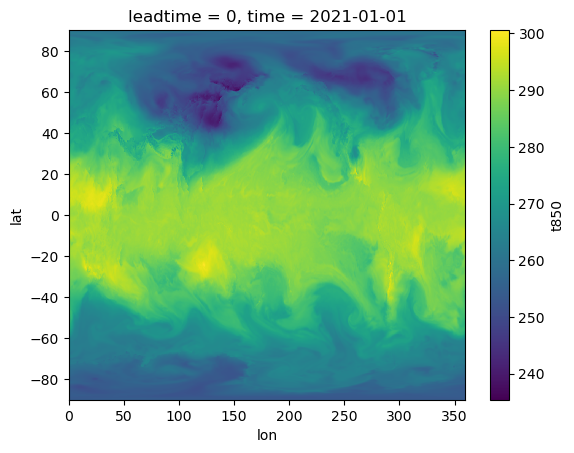